In [1]:
import os
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor, TSFreshRelevantFeatureExtractor
from sktime.datasets import load_from_ucr_tsv_to_dataframe
from sktime.transformations.panel.rocket import Rocket
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import glob
import matplotlib.pyplot as plt

In [2]:
data = {'method': [], 'accuracy': [], 'dataset': []}

In [3]:
for dataset in [x.split('/')[1] for x in glob.glob('UCRArchive_2018/*')][::6]:
    try:
        X_train, y_train = load_from_ucr_tsv_to_dataframe(
            os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TRAIN.tsv")
        )

        X_test, y_test = load_from_ucr_tsv_to_dataframe(
            os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TEST.tsv")
        )

        scaler = TabularToSeriesAdaptor(RobustScaler())

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        for transform in [Rocket(num_kernels=128), TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False, n_jobs=-1)]:
            X_train_tranform = transform.fit_transform(X_train, y_train)
            X_test_tranform = transform.transform(X_test, y_test)

            rf = RandomForestClassifier(n_jobs=-1)
            rf.fit(X_train_tranform, y_train)
            y_pred = rf.predict(X_test_tranform)
            data['method'].append(type(transform).__name__)
            data['accuracy'].append(accuracy_score(y_test, y_pred))
            data['dataset'].append(dataset)
    except:
        pass

Feature Extraction: 100%|██████████| 246/246 [04:21<00:00,  1.06s/it]


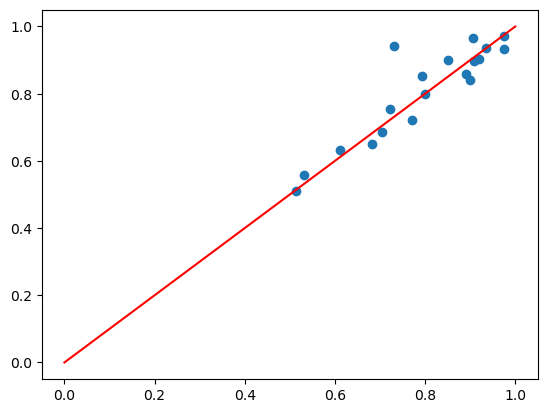

In [4]:
df = pd.DataFrame(data).sort_values(['dataset', 'method'])
r = df.query('method=="Rocket"')['accuracy']
t = df.query('method=="TSFreshFeatureExtractor"')['accuracy']
plt.scatter(list(r), list(t))
plt.plot([0, 1], [0, 1], color='red')

In [5]:
df

method  accuracy                     dataset
14                   Rocket  0.800000                        Beef
15  TSFreshFeatureExtractor  0.800000                        Beef
18                   Rocket  0.850000                   BeetleFly
19  TSFreshFeatureExtractor  0.900000                   BeetleFly
22                   Rocket  0.731884                CinCECGTorso
23  TSFreshFeatureExtractor  0.942754                CinCECGTorso
16                   Rocket  0.682051                    CricketY
17  TSFreshFeatureExtractor  0.651282                    CricketY
4                    Rocket  0.936000                     ECG5000
5   TSFreshFeatureExtractor  0.936444                     ECG5000
6                    Rocket  0.722215             ElectricDevices
7   TSFreshFeatureExtractor  0.755803             ElectricDevices
12                   Rocket  0.891429                        Fish
13  TSFreshFeatureExtractor  0.857143                        Fish
34                   Rocket  0.974684             GunPointAgeSpan
35  TSFreshFeatureExtractor  0.971519             GunPointAgeSpan
2                    Rocket  0.704762                         Ham
3   TSFreshFeatureExtractor  0.685714                         Ham
20                   Rocket  0.512987                     Haptics
21  TSFreshFeatureExtractor  0.509740                     Haptics
24                   Rocket  0.611111         InsectWingbeatSound
25  TSFreshFeatureExtractor  0.633333         InsectWingbeatSound
8                    Rocket  0.792000      LargeKitchenAppliances
9   TSFreshFeatureExtractor  0.853333      LargeKitchenAppliances
26                   Rocket  0.770492                  Lightning2
27  TSFreshFeatureExtractor  0.721311                  Lightning2
28                   Rocket  0.532468             MiddlePhalanxTW
29  TSFreshFeatureExtractor  0.558442             MiddlePhalanxTW
10                   Rocket  0.907348                  MoteStrain
11  TSFreshFeatureExtractor  0.896166                  MoteStrain
36                   Rocket  0.919593  NonInvasiveFetalECGThorax1
37  TSFreshFeatureExtractor  0.903308  NonInvasiveFetalECGThorax1
32                   Rocket  0.906667              SmoothSubspace
33  TSFreshFeatureExtractor  0.966667              SmoothSubspace
0                    Rocket  0.899265       SonyAIBORobotSurface2
1   TSFreshFeatureExtractor  0.841553       SonyAIBORobotSurface2
30                   Rocket  0.973869                     Symbols
31  TSFreshFeatureExtractor  0.933668                     Symbols

In [6]:
sdfgsf=sfgdsg

NameError: name 'sfgdsg' is not defined

In [ ]:
transform_rocket = Rocket(num_kernels=128)
X_train_rocket = transform_rocket.fit_transform(X_train, y_train)
X_test_rocket = transform_rocket.fit_transform(X_test, y_test)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_rocket, y_train)
y_pred = rf.predict(X_test_rocket)
data['method'].append('rocket')
data['accuracy'].append(accuracy_score(y_test, y_pred))
data['dataset'].append(dataset)

In [ ]:
transform_tsfresh = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False, n_jobs=-1)
X_train_tsfresh = transform_tsfresh.fit_transform(X_train, y_train)
X_test_tsfres = transform_tsfresh.fit_transform(X_test, y_test)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_tsfresh, y_train)
y_pred = rf.predict(X_test_tsfres)
data['method'].append('tsfresh')
data['accuracy'].append(accuracy_score(y_test, y_pred))
data['dataset'].append(dataset)

In [ ]:
pd.DataFrame(data)